# Analysis of the learning

The folder "Data" contains three types of dataset:
* Error Data - 
* Reproduction Time - time of each individuals to finish the task of reproduction
* Survey Data - 

For each type of data, there are two files for the distinct groups:
* AR group
* Control group

This document is tructured into 3 sections: 
* Analysis of the time spent to reproduce the task learnt with AR headset or with teacher
* Analysis of the error rate when reproducing the learnt task
* Analysis of the survey

Import the libraries required by the different analysis of this notebook

In [56]:
import numpy as np
import pandas as pd
import plot_likert
import matplotlib.pyplot as plt

from scipy import stats



## Analysis of the time spent to reproduce the task learnt with AR headset or with teacher

In [8]:
pathTimeAR = "./Data/ReproductionTime_ARGroup.xlsx"
pathTimeControl = "./Data/ReproductionTime_ControlGroup.xlsx"

Prepare data of the time spent by each participant into an array.

In [80]:
dataTimeAR = pd.read_excel(pathTimeAR, usecols=['Time'])
dataTimeControl = pd.read_excel(pathTimeControl, usecols=['Time'])

<class 'pandas.core.frame.DataFrame'>


Calculate the average of the time spent.

In [10]:
Control_Mean = dataTimeControl.mean()
AR_Mean = dataTimeAR.mean()


Calculate the standard deviation of the time of each group.

In [11]:
Control_Std_Deviation = dataTimeControl.std()
AR_Std_Deviation = dataTimeAR.std()

Format the data to be displayed into a graph.

In [58]:
Error = [Control_Std_Deviation['Time'], AR_Std_Deviation['Time']]
Groups = ["Control", "AR"]
Results = [Control_Mean['Time'], AR_Mean['Time']]

Produce the illustartion.

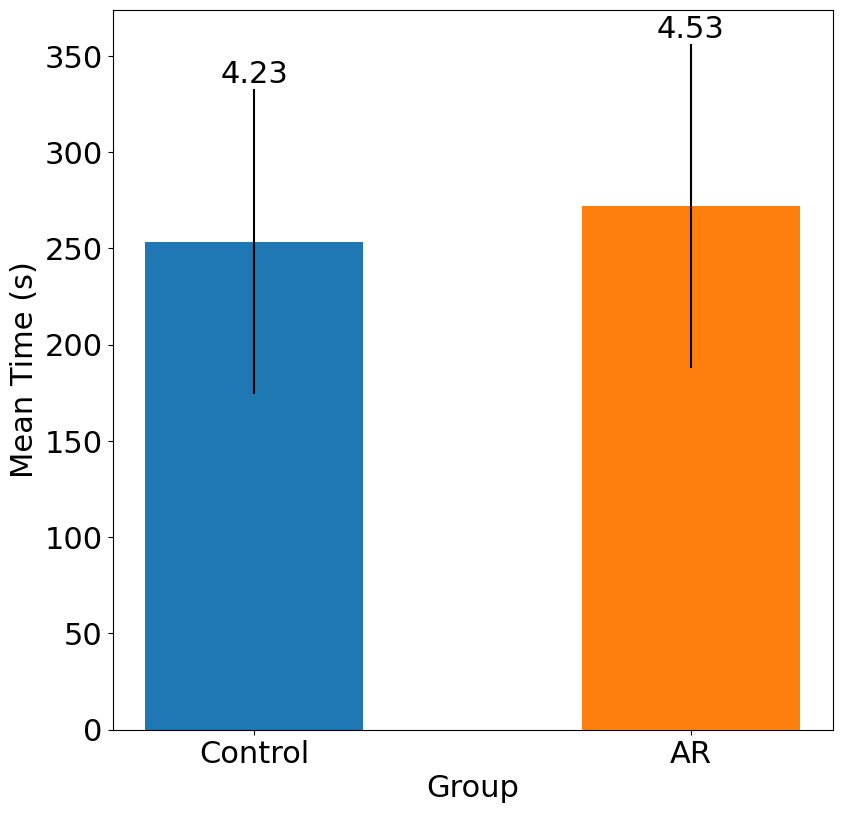

In [ ]:
groupcolor = ['tab:blue', 'tab:orange']
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group')
bars = ax.bar(Groups, Results, yerr = Error, width = 0.5, color = groupcolor, align = 'center')
minlabel = [Results[0]/60, Results[1]/60]
minlabel = ['%.2f'% elem for elem in minlabel]
ax.bar_label(bars,minlabel )
plt.show()

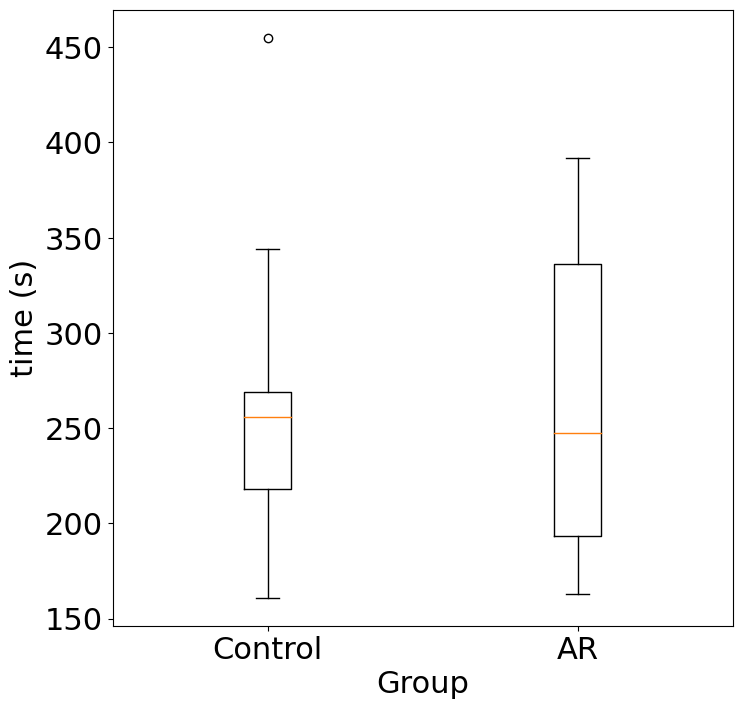

In [48]:
fig = plt.figure(figsize=(8, 8))
ax = fig.subplots()
#ax.set_title('Time spent to reproduce')
ax.boxplot([dataTimeControl['Time'], dataTimeAR['Time']], labels=["Control", "AR"])
ax.set_ylabel('time (s)')
ax.set_xlabel('Group')
plt.show()

In [87]:
TimeControlGp = dataTimeControl.to_numpy()
TimeARGp = dataTimeAR.to_numpy()
F = np.var(TimeARGp) / np.var(TimeControlGp)

1.1482253707361614
    Time
0    321
1    185
2    340
3    230
4    182
5    324
6    203
7    390
8    265
9    174
10   163
11   223
12   227
13   392
14   384
15   318
16   190
17   385
<class 'numpy.ndarray'>


In [57]:
unilat_test = stats.ttest_ind(a=TimeARGp, b=TimeControlGp, equal_var=False, alternative="less")
print(f"Unilateral test (Control group faster than AR group): {unilat_test}")

Unilateral test (Control group faster than AR group): Ttest_indResult(statistic=array([0.62282572]), pvalue=array([0.73067553]))


## Analysis of the error rate when reproducing the learnt task

In [14]:
pathErrorAR = "./Data/ErrorData_ARGroup.xlsx"
pathErrorControl = "./Data/ErrorData_ControlGroup.xlsx"

In [15]:
dataErrorAR = pd.read_excel(pathErrorAR)
dataErrorControl = pd.read_excel(pathErrorControl)

Calculate the mean of the respective error type.

In [16]:
error_mean_AR = dataErrorAR.mean(numeric_only=True)
error_mean_control = dataErrorControl.mean(numeric_only=True)

Calculate the Standard deviation of the respective error type.

In [17]:
error_deviation_AR = dataErrorAR.std(numeric_only=True)
error_deviation_control = dataErrorControl.std(numeric_only=True)

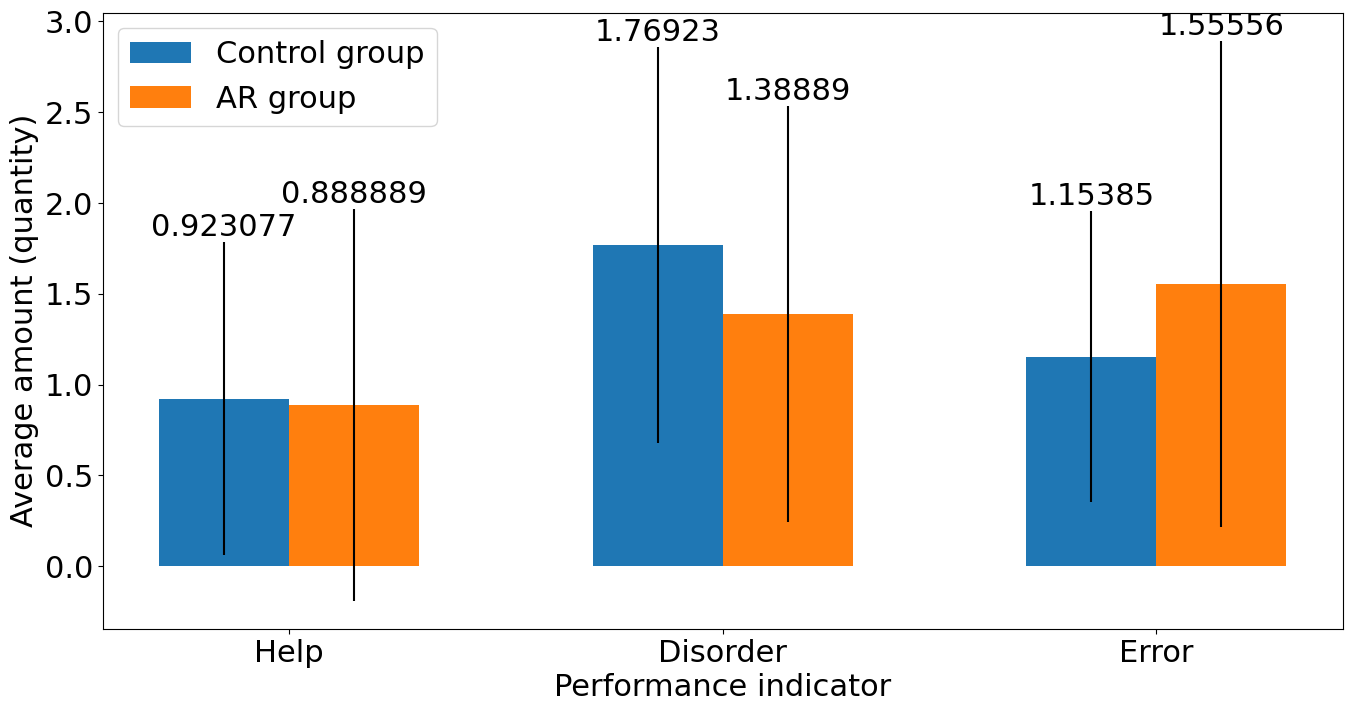

In [64]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

Error_Types = np.array(['Help', 'Disorder', 'Error'])
X_Axis =  np.arange(len(Error_Types))

Control_rect = ax.bar(X_Axis - 0.15, error_mean_control, yerr = error_deviation_control, width = 0.3, label = "Control group")
AR_rect = ax.bar(X_Axis + 0.15, error_mean_AR, yerr = error_deviation_AR, width = 0.3, label = "AR group")

ax.set_xticks(X_Axis, Error_Types)
ax.set_ylabel("Average amount (quantity)")
ax.set_xlabel("Performance indicator")
ax.bar_label(Control_rect)
ax.bar_label(AR_rect)
ax.legend(loc = 'upper left')
plt.show()

In [93]:
PerfIndControlGp = dataErrorAR[['Help']].to_numpy()
PerfIndARGp = dataErrorControl[['Help']].to_numpy()

In [92]:
bilat_test_help = stats.ttest_ind(a=PerfIndControlGp, b=PerfIndARGp, equal_var=False)
print(f"Bilateral test (AR group help requests average different from Control group help requests average): {bilat_test_help}")

Bilateral test (Control group faster than AR group): Ttest_indResult(statistic=array([-0.09794733]), pvalue=array([0.92265655]))


In [94]:
bilat_test_disorder = stats.ttest_ind(a=dataErrorAR[['Disorder']].to_numpy(), b=dataErrorControl[['Disorder']].to_numpy(), equal_var=False)
print(f"Bilateral test (AR group disorder average different from Control group disorder average): {bilat_test_disorder}")

Bilateral test (AR group disorder average different from Control group disorder average): Ttest_indResult(statistic=array([-0.93770427]), pvalue=array([0.35679394]))


In [95]:
bilat_test_error = stats.ttest_ind(a=dataErrorAR[['Error']].to_numpy(), b=dataErrorControl[['Error']].to_numpy(), equal_var=False)
print(f"Bilateral test (AR group error average different from Control group error average): {bilat_test_error}")

Bilateral test (AR group error average different from Control group error average): Ttest_indResult(statistic=array([1.04137852]), pvalue=array([0.30654302]))


## Analysis of the survey

In [31]:
pathAR = "./Data/SurveyData_ARGroup-extended.xlsx"
pathC = "./Data/SurveyData_ControlGroup-extended.xlsx"

Creating custom scale for each question.

In [32]:
ARCQ1scale = ['Useless', 'Scarcely useful', 'Moderately useful', 'Almost useful', 'Useful']
ARCQ2scale = ['Unable', 'Barely able', 'Moderately able', 'Almost able', 'Completely able']
ARCQ3scale = ['Not at all clear', 'Not much clear', 'Underestandable', 'Very clear', 'Limpid']
ARCQ4scale = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ARQ5scale = ['Very difficult', 'Difficult', 'Neutral', 'Easy', 'Very easy']
ARQ6scale = ['Very messy', 'Messy', 'Underestandable', 'Clear', 'Very clear']


In [33]:
dataAR1 = pd.read_excel(pathAR, usecols=['ARQ1'])
dataAR2 = pd.read_excel(pathAR, usecols=['ARQ2'])
dataAR3 = pd.read_excel(pathAR, usecols=['ARQ3'])
dataAR4 = pd.read_excel(pathAR, usecols=['ARQ4'])
dataAR5 = pd.read_excel(pathAR, usecols=['ARQ5'])
dataAR6 = pd.read_excel(pathAR, usecols=['ARQ6'])
dataC1 = pd.read_excel(pathC, usecols=['CQ1'])
dataC2 = pd.read_excel(pathC, usecols=['CQ2'])
dataC3 = pd.read_excel(pathC, usecols=['CQ3'])
dataC4 = pd.read_excel(pathC, usecols=['CQ4'])

d:\Users\gabriel2\Documents\Projets\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\I

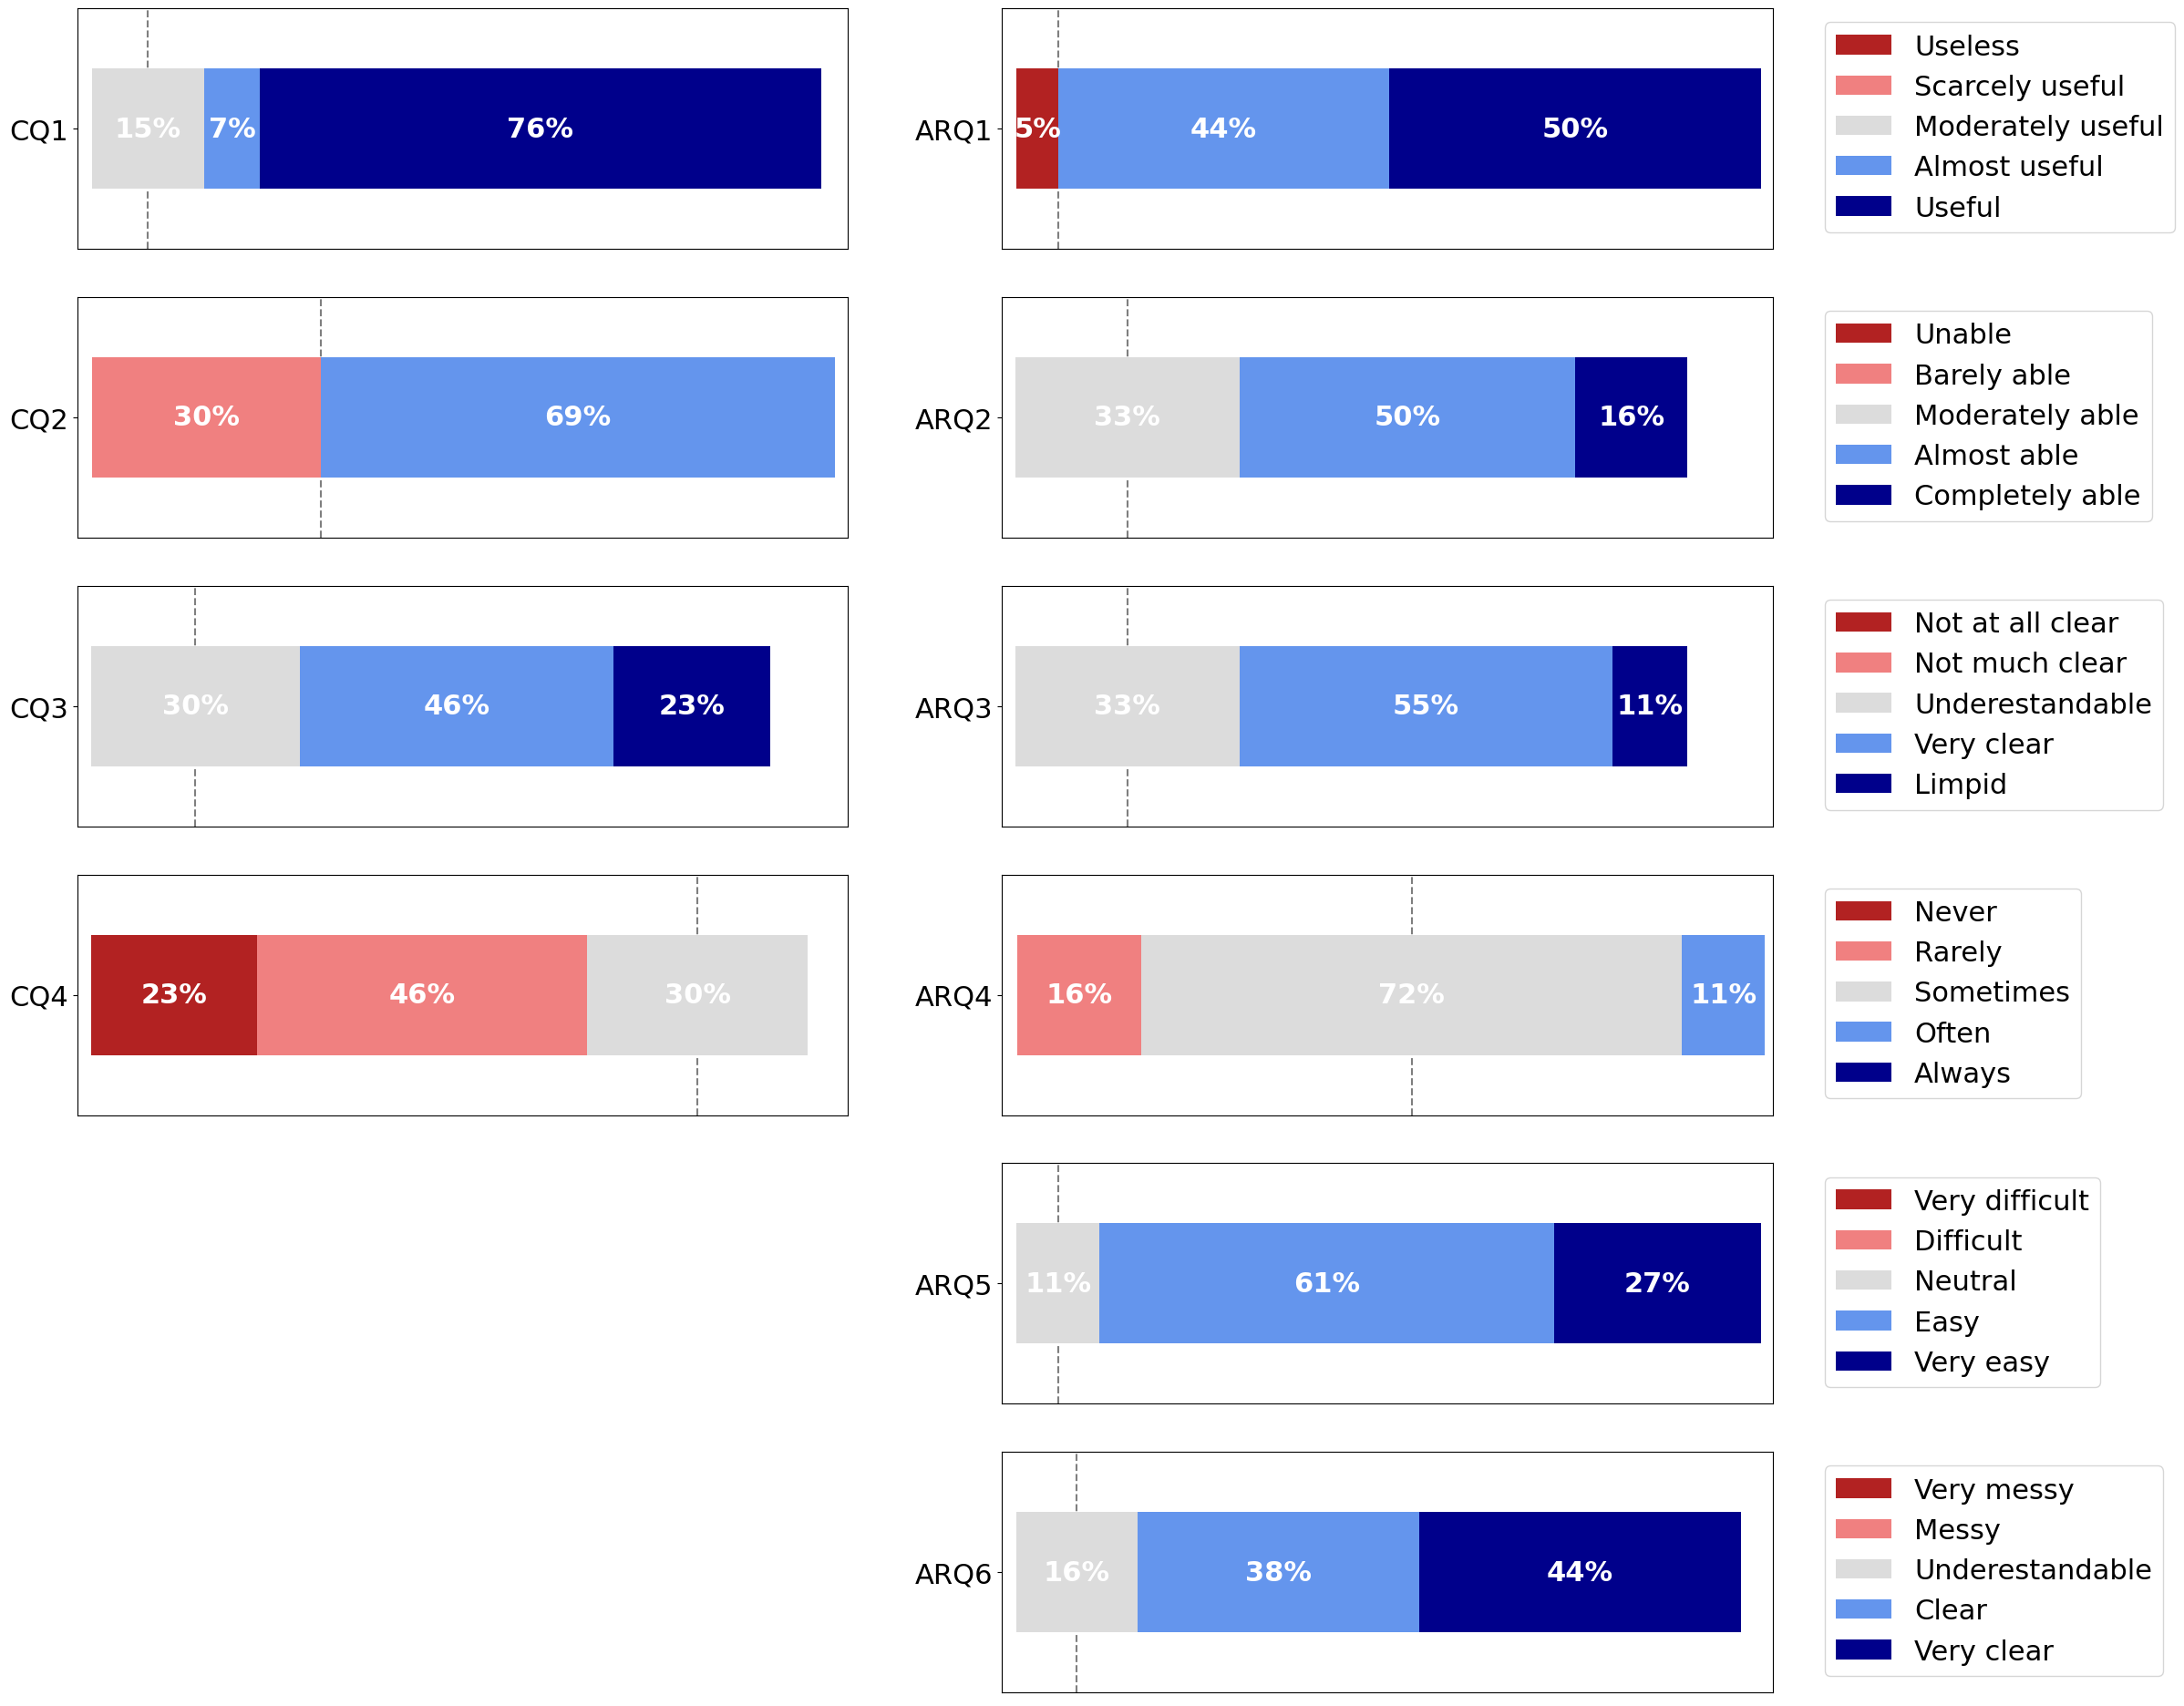

In [35]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)

#control group likert statistics
plot_likert.plot_likert(dataC1,ARCQ1scale, plot_percentage = True, bar_labels = True, ax = axes[0,0] )
plot_likert.plot_likert(dataC2,ARCQ2scale, plot_percentage = True, bar_labels = True, ax = axes[1,0] )
plot_likert.plot_likert(dataC3,ARCQ3scale, plot_percentage = True, bar_labels = True, ax = axes[2,0] )
plot_likert.plot_likert(dataC4,ARCQ4scale, plot_percentage = True, bar_labels = True, ax = axes[3,0] )

#AR group likert statistics
plot_likert.plot_likert(dataAR1,ARCQ1scale, plot_percentage = True, bar_labels = True, ax = axes[0,1] )
plot_likert.plot_likert(dataAR2,ARCQ2scale, plot_percentage = True, bar_labels = True, ax = axes[1,1] )
plot_likert.plot_likert(dataAR3,ARCQ3scale, plot_percentage = True, bar_labels = True, ax = axes[2,1] )
plot_likert.plot_likert(dataAR4,ARCQ4scale, plot_percentage = True, bar_labels = True, ax = axes[3,1] )
plot_likert.plot_likert(dataAR5,ARQ5scale, plot_percentage = True, bar_labels = True, ax = axes[4,1])
plot_likert.plot_likert(dataAR6,ARQ6scale, plot_percentage = True, bar_labels = True, ax = axes[5,1])

#Some visualization management before plotting.
for i in range(6):
    axes[i,0].axes.xaxis.set_visible(False)
    axes[i,1].axes.xaxis.set_visible(False)

for i in range(4):
    axes[i,0].get_legend().remove()
    
axes[4,0].set_visible(False)
axes[5,0].set_visible(False)

#plt.rcParams['figure.figsize'] = [24, 24]
plt.show()
